# 生成词云

词云参数：https://blog.csdn.net/kun1280437633/article/details/89474284

In [76]:
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import jieba
import pandas as pd


In [3]:
#读取文件
data = pd.read_csv('../../datasets/MovieLens/movies.csv')

In [4]:
data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
title = ' '.join()

Object `join` not found.


In [8]:
title = ' '.join(data['title'])

In [46]:
#将genres列的值进行抽取后，变成list。join与split是一对相反操作函数
genres_list = data['genres'].str.split('|')

In [52]:
genres = ' '.join(genres_list.str.join(' '))

In [53]:
all_word = title + genres

In [59]:
type(all_word)

str

In [56]:
#去除停用词,这个还需要优化，可以在分词后去除停用词更准去。
def remove_stop_words(f):
    stop_words = ['Movie']
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

In [61]:
#对文本进行分词，同时对分词后的单词进行连接。
text = ' '.join(jieba.cut(all_word))

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/7z/f6j_h1yx5hlggj5f7ds_t__r0000gn/T/jieba.cache
Loading model cost 0.822 seconds.
Prefix dict has been built succesfully.


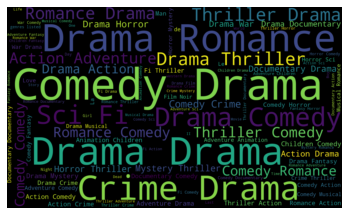

In [68]:
# 生成对象
wc = WordCloud(max_words=100,
            width=2000,
            height=1200,)
wordcloud = wc.generate(text)
# 显示词云
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

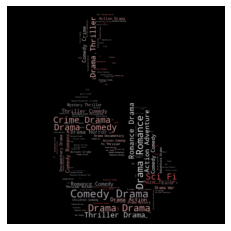

In [79]:
mask = np.array(Image.open("../../datasets/MovieLens/gg.png"))
wc = WordCloud(mask=mask,
            width=2000,
            height=1200,
            mode='RGBA', 
            background_color=None)

wordcloud = wc.generate(text)

#从图片中提取颜色
image_colors = ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)

# 显示词云
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()